In [1]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import nltk
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
STOPWORDS = set(stopwords.words('english'))
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data = pd.read_csv(r"..\Data\amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [5]:
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [6]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [8]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


In [9]:
print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [10]:
data.dropna(inplace=True)

In [11]:
data['length'] = data['verified_reviews'].apply(len)

In [12]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [13]:
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


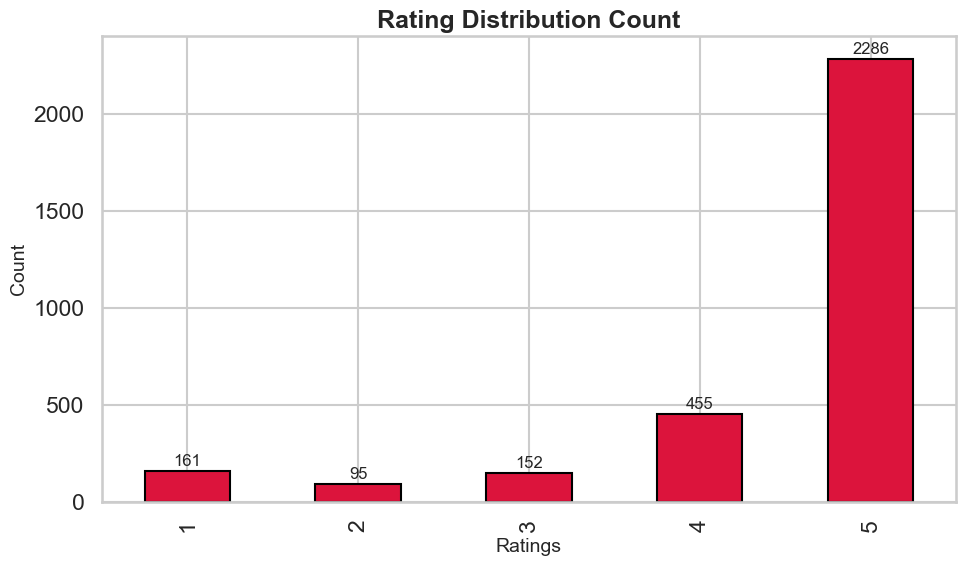

In [14]:
sns.set(style='whitegrid', context='talk')

# Set figure size
plt.figure(figsize=(10, 6))

# Bar plot with red color and edge styling
data['rating'].value_counts().sort_index().plot.bar(
    color='crimson',
    edgecolor='black'
)

# Set title and labels with font size
plt.title('Rating Distribution Count', fontsize=18, weight='bold')
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show values on top of bars
for index, value in enumerate(data['rating'].value_counts().sort_index()):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

In [15]:
print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


In [16]:
print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [17]:
review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [18]:
review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


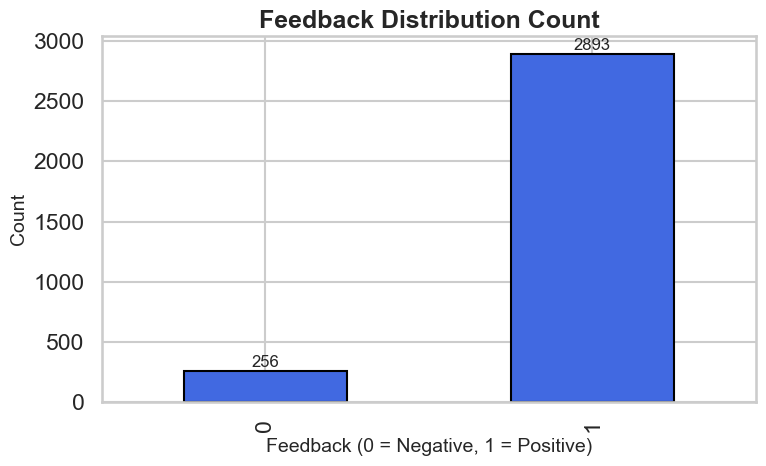

In [19]:
# Set the style
sns.set(style='whitegrid', context='talk')

# Set figure size
plt.figure(figsize=(8, 5))

# Plot feedback distribution
data['feedback'].value_counts().sort_index().plot.bar(
    color='royalblue',
    edgecolor='black'
)

# Set title and axis labels
plt.title('Feedback Distribution Count', fontsize=18, weight='bold')
plt.xlabel('Feedback (0 = Negative, 1 = Positive)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add value labels on bars
for index, value in enumerate(data['feedback'].value_counts().sort_index()):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

# Layout adjustment
plt.tight_layout()
plt.show()

In [20]:
print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


In [21]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [22]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [23]:
print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


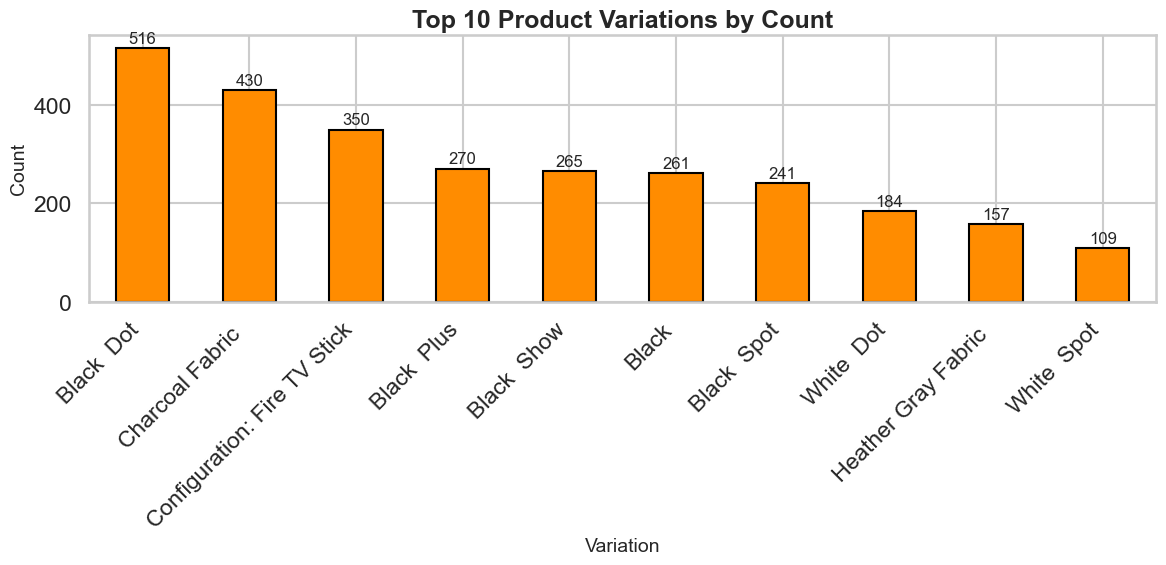

In [24]:
# Set seaborn style
sns.set(style='whitegrid', context='talk')

# Top 10 variations
top_variations = data['variation'].value_counts().head(10)

# Set figure size
plt.figure(figsize=(12, 6))

# Bar plot
top_variations.plot.bar(
    color='darkorange',
    edgecolor='black'
)

# Title and labels
plt.title('Top 10 Product Variations by Count', fontsize=18, weight='bold')
plt.xlabel('Variation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value labels
for index, value in enumerate(top_variations):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [25]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

In [26]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

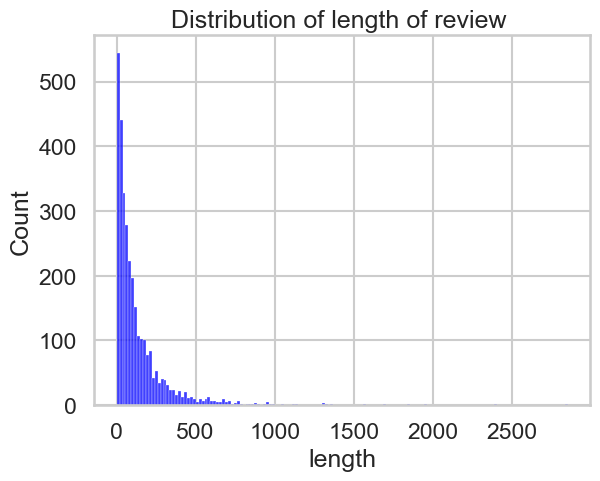

In [27]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

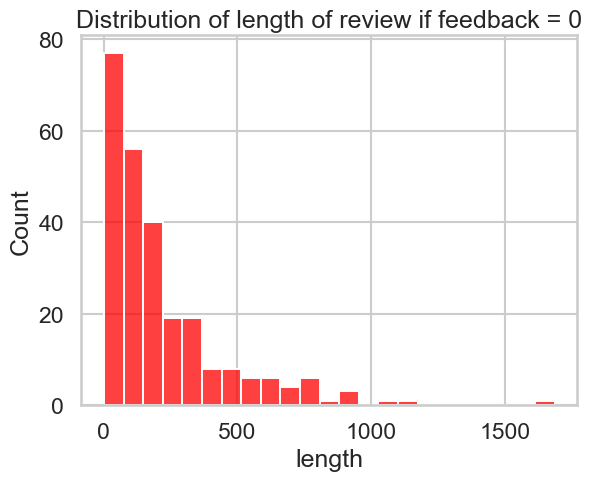

In [28]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

In [29]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

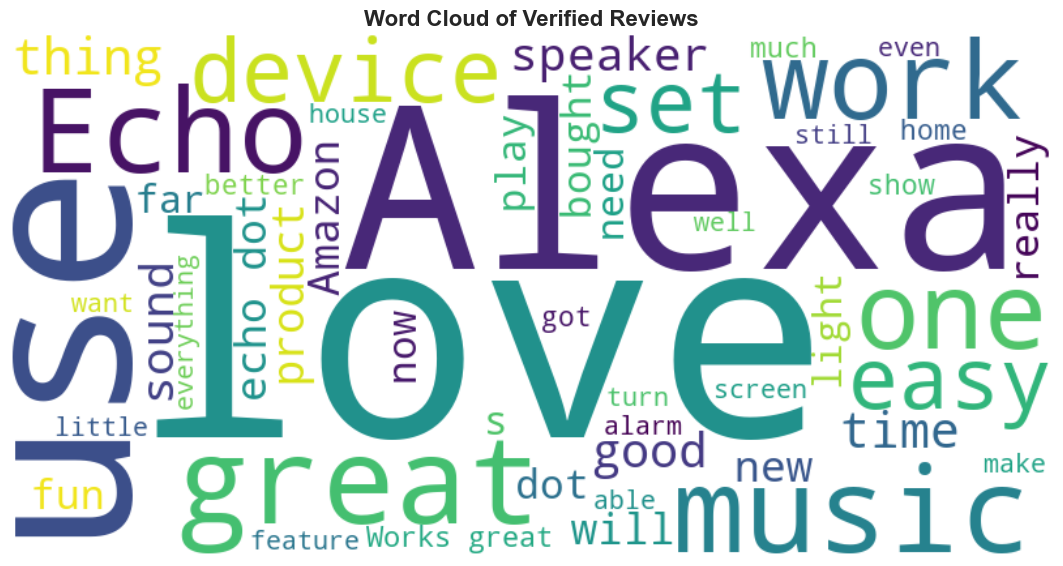

In [30]:
# Combine all non-null reviews into one string
reviews = " ".join(str(review) for review in data['verified_reviews'].dropna())

# Initialize WordCloud object with better customization
wc = WordCloud(
    background_color='white',
    max_words=50,
    width=800,
    height=400,
    colormap='viridis',  # Optional: try 'inferno', 'plasma', etc.
    contour_color='steelblue',
    contour_width=1
)

# Generate word cloud
wordcloud_image = wc.generate(reviews)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.title('Word Cloud of Verified Reviews', fontsize=16, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [31]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

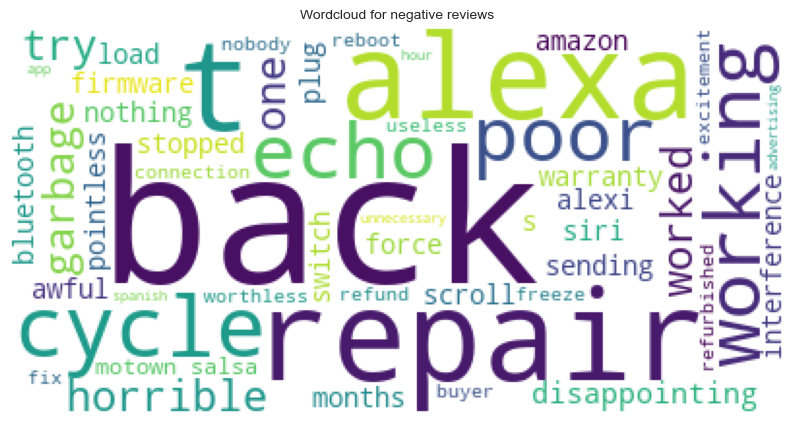

In [32]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

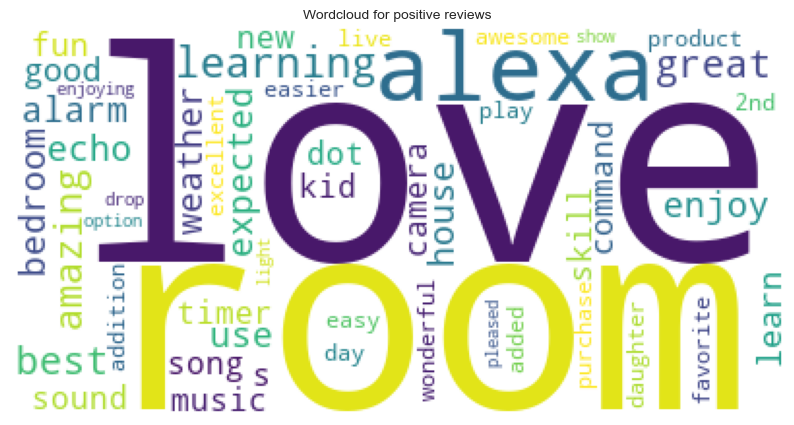

In [33]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()